<div style="text-align: right"> Виноградов Егор </div>
<div style="text-align: right"> студент 1 курса магистерской программы «Науки о данных»</div>

<h2 align="center"> Домашняя работа </h2>

⭐ Настало время попробовать свои силы в настоящей _Data Science_ задаче с [Kaggle](https://www.kaggle.com/mathchi/churn-for-bank-customers).

Файл с исходными данными вы можете скачать [здесь](https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block/churn.zip).

##### Описание данных
1.  `RowNumber` — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2.  `CustomerId` — идентификатор клиента
3.  `Surname` — фамилия клиента
4.  `CreditScore` — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5.  `Geography` — страна клиента (банк международный)
6.  `Gender` — пол клиента
7.  `Age` — возраст клиента
8.  `Tenure` — сколько лет клиент пользуется услугами банка
9. `Balance` — баланс на счетах клиента в банке
10.  `NumOfProducts` — количество услуг банка, которые приобрёл клиент
11.  `HasCrCard` — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12.  `IsActiveMember` — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13.  `EstimatedSalary` — предполагаемая заработная плата клиента
14.  `Exited` — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly
import plotly.express as px

In [2]:
url = 'https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block/churn.zip'
churn_data = pd.read_csv(url)
churn_data.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ЗАДАНИЯ

### 9.1. Каково соотношение ушедших и лояльных клиентов?
Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

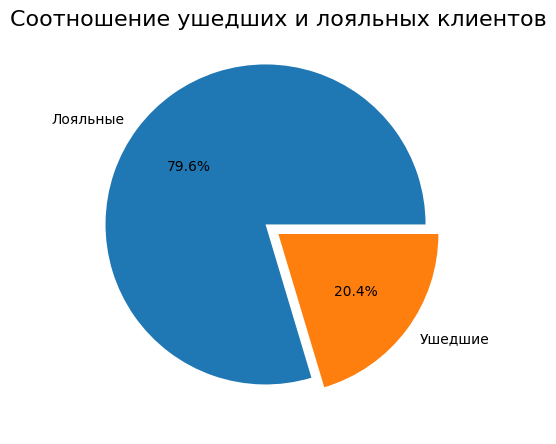

In [3]:
churn_data_Exited = churn_data.Exited.value_counts()
churn_data_Exited.index = ['Лояльные', 'Ушедшие']
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data_Exited,
    labels=churn_data_Exited.index,
    autopct='%.1f%%',
    explode = [0.1, 0]
)
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)

**Комментарии к графику:**  

По графику можно сделать вывод о том, что в базе содержится больше данных о лояльных клиентах, чем ушедших

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
Опишите распределение и сделайте выводы.

<AxesSubplot:title={'center':'Распределение баланса клиентов'}, ylabel='Frequency'>

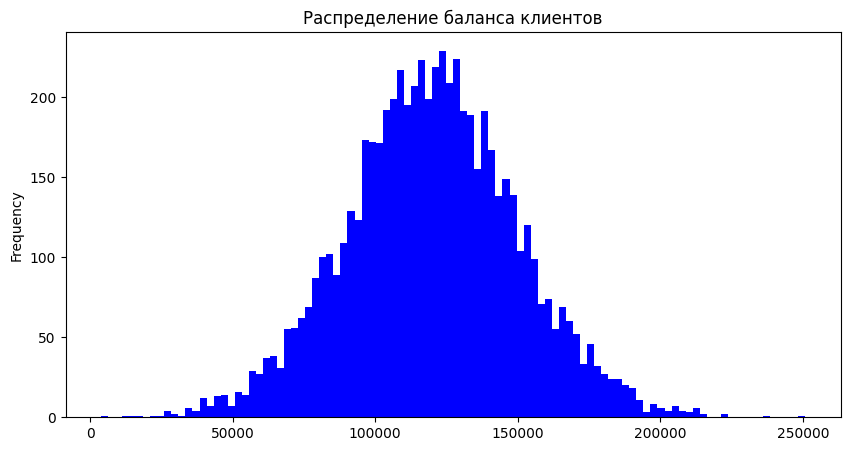

In [4]:
churn_data[churn_data.Balance > 2_500].Balance.plot(
    kind='hist',
    figsize=(10, 5),
    title='Распределение баланса клиентов',
    grid = False,
    color = 'blue',
    bins=100,
)

**Комментарии к графику:**  

Наблюдается нормальное распределение. Наибольшее количество клиентов имеют баланс в диапазоне от 100 тыс. до 130 тыс.

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0.5, 1.0, 'Распределение баланса клиентов по признаку лояльности')

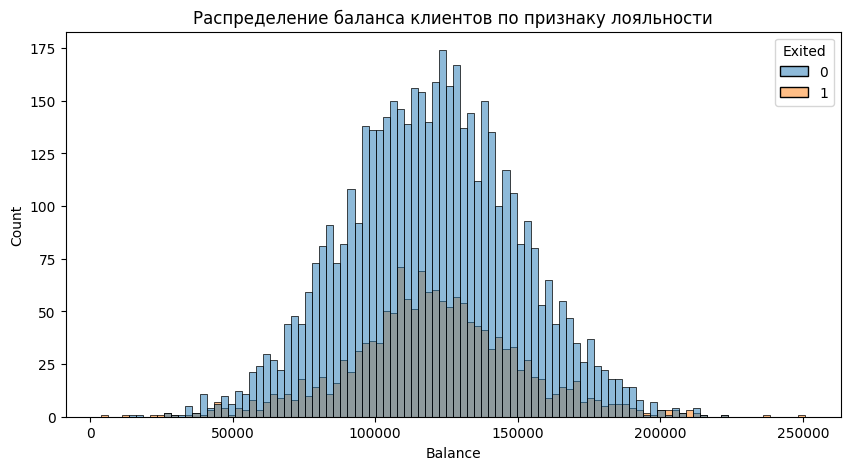

In [5]:
fig = plt.figure(figsize=(10, 5))

barplot = sns.histplot(
    data=churn_data[churn_data.Balance > 2500],
    x='Balance',
    hue='Exited',
    bins=100
)
barplot.set_title('Распределение баланса клиентов по признаку лояльности')

**Комментарии к графику:**  

Так как данные не сбалансированы, то судить об абсолютном превышении людей каждой категории нельзя. То есть среднее отношения ушедших клиентов к лояльным равно 1 к 5. Но на графике видно, что при минимальных значенях баланса либо при максимальных данная пропорция нарушается. Сделаем возможным сравнивать две категории друг с другом путём получения отношения ушедших и лояльных в каждой группе баланса. И сравним получившиеся значения со значением данного показателя для всех данных в целом

In [6]:
# Создадим столбцев кагории Balance
churn_data['Balance_Round'] = churn_data.Balance.apply(lambda x: int(x - x%10000))

In [7]:
table = pd.pivot_table(churn_data[churn_data['Balance'] > 2500], values='CustomerId', index=['Balance_Round'], columns=['Exited'], aggfunc='count')
table.columns = ['Count_Exited_0', 'Count_Exited_1']

table['Ratio Exited_1/Exited_0'] = round(table['Count_Exited_1'] / table['Count_Exited_0'], 2)
table['Ratio Exited_0/Exited_1'] = round(table['Count_Exited_0'] / table['Count_Exited_1'], 2)
table['Count_Exited_1'] = table['Count_Exited_1'].fillna(0)
table['Count_Exited_0'] = table['Count_Exited_0'].fillna(0)
table['All'] = round(table['Count_Exited_0'] + table['Count_Exited_1'], 0)
table['Ratio Exited_1/All'] = round(table['Count_Exited_1'] / table['All']  * 100, 2)
table['Ratio Exited_0/All'] = round(table['Count_Exited_0'] / table['All'] * 100, 2)

# Типы данных
table['All'] = table['All'].astype(int)
table['Count_Exited_0'] = table['Count_Exited_0'].astype(int)
table['Count_Exited_1'] = table['Count_Exited_1'].astype(int)

Text(0.5, 1.0, 'Отношение количества ушедших клиентов ко всем в каждой категории баланса')

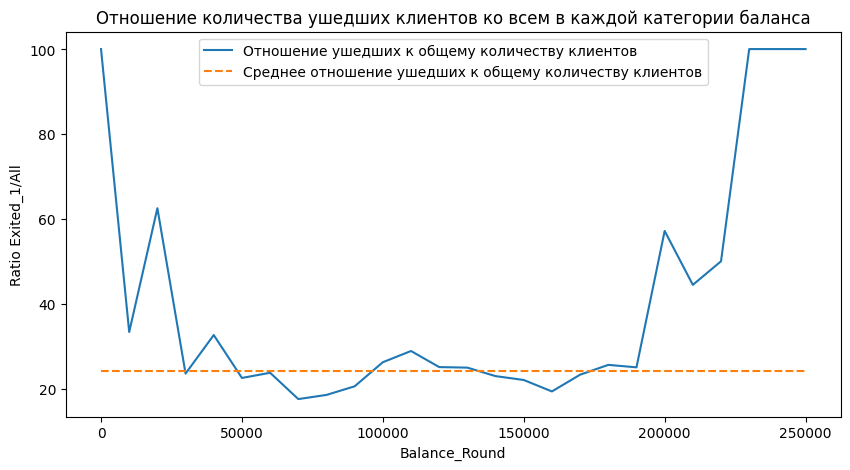

In [8]:
fig = plt.figure(figsize=(10, 5))

plot2 = sns.lineplot(
    data=table,
    x=table.index,
    y=table['Ratio Exited_1/All'],
    label="Отношение ушедших к общему количеству клиентов"
)

plot3 = sns.lineplot(
    x=table.index,
    y=churn_data[churn_data.Balance > 2500].Exited.value_counts()[1] / churn_data[churn_data.Balance > 2500].shape[0] * 100,
    linestyle='dashed',
    label="Среднее отношение ушедших к общему количеству клиентов"
)

plot2.set_title('Отношение количества ушедших клиентов ко всем в каждой категории баланса')

Text(0.5, 1.0, 'Отношение количества ушедших клиентов к количуству лояльных в каждой категории баланса')

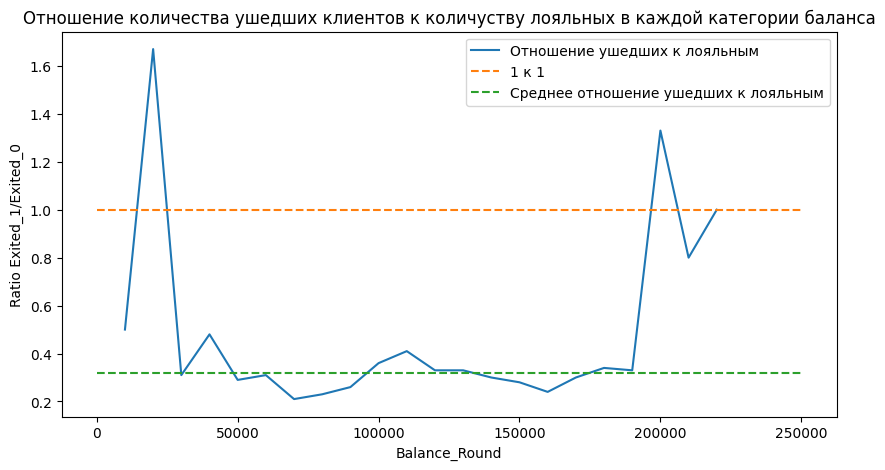

In [9]:
fig = plt.figure(figsize=(10, 5))

plot1 = sns.lineplot(
    data=table,
    x=table.index,
    y=table['Ratio Exited_1/Exited_0'],
    label="Отношение ушедших к лояльным"
)
plot2 = sns.lineplot(
    x=table.index,
    y=1,
    linestyle='dashed',
    label="1 к 1"
)
plot3 = sns.lineplot(
    x=table.index,
    y=churn_data[churn_data.Balance > 2500].Exited.value_counts()[1] / churn_data[churn_data.Balance > 2500].Exited.value_counts()[0],
    linestyle='dashed',
    label="Среднее отношение ушедших к лояльным"
)

plot1.set_title('Отношение количества ушедших клиентов к количуству лояльных в каждой категории баланса')

**Комментарии к графику:**  

Можно заметить, что клиентов с балансом, большим 200к или меньшим 30к, значитально больше среди ушедших, нежели оставшихся. Предположим, что их не устроили условия обслуживания счёта: данный банк не выгоден людям со суммой счёта меньшей, чем 30к, или большей, чем 200к (комиссии или платы за обслуживания)

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов?
На какую возрастную категорию клиентов стоит обратить внимание банку?

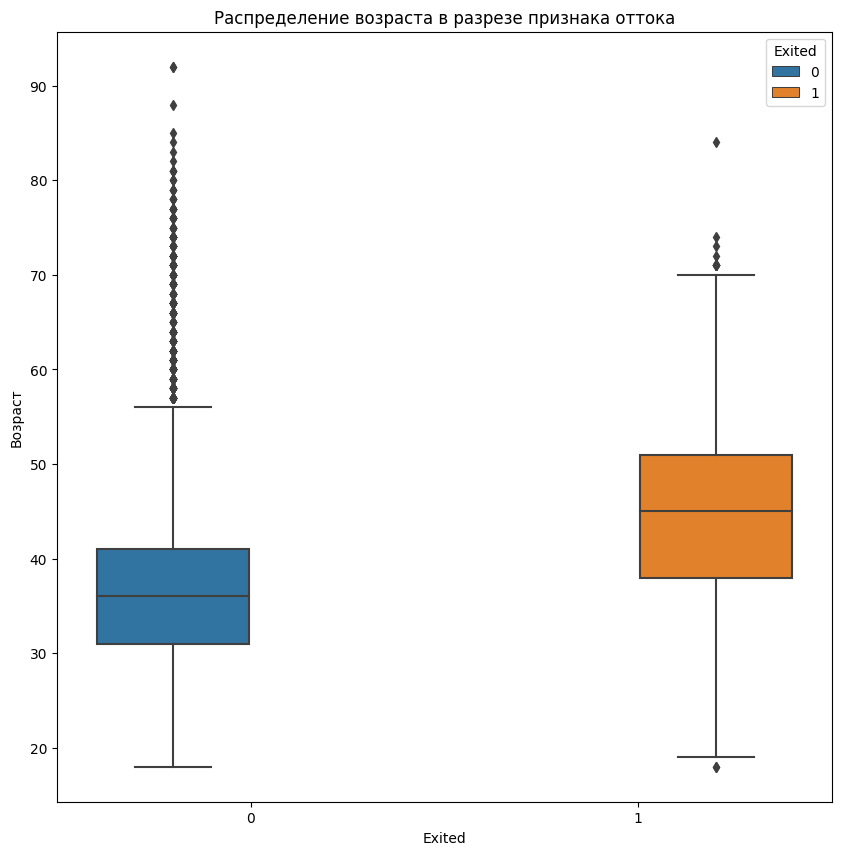

In [10]:
fig = plt.figure(figsize=(10, 10))
plot = sns.boxplot(
    data=churn_data,
    y = 'Age',
    x = 'Exited',
    hue = 'Exited',
).set(title='Распределение возраста в разрезе признака оттока', ylabel='Возраст')

**Комментарии к графику:**  

Потенциальных выбросов больше в группе оставшихся клиентов. Банку стоит обратить внимание на клиентов старше 45 лет.

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
Добавьте расцветку по признаку оттока клиентов.  
Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

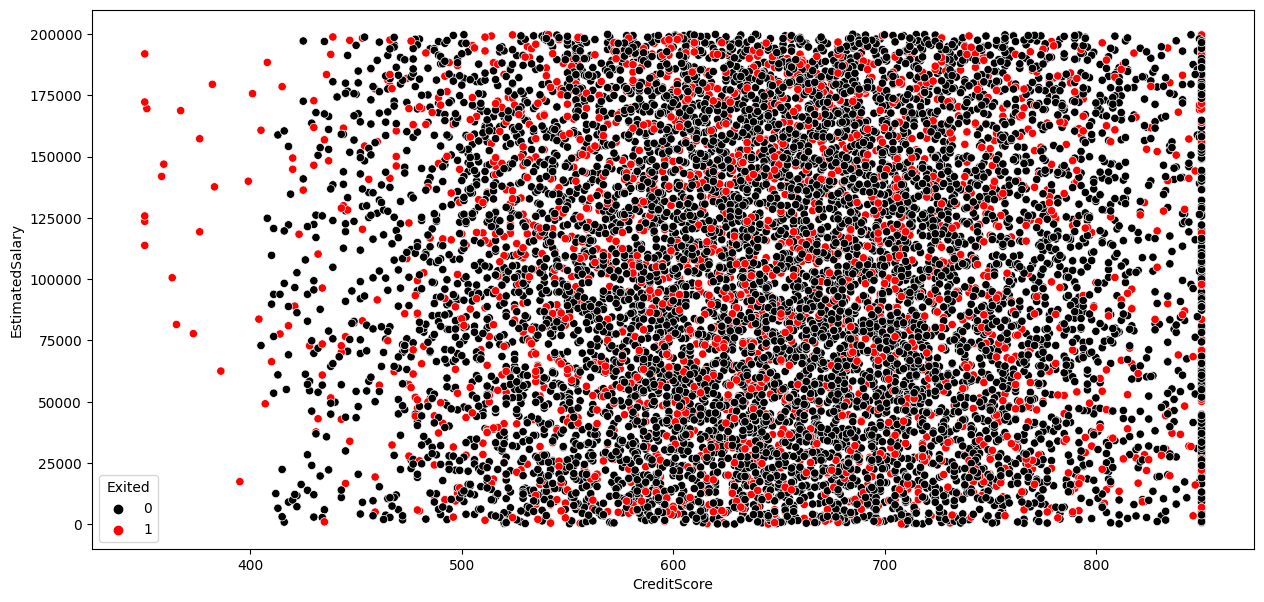

In [11]:
fig = plt.figure(figsize=(15, 7))
plot = sns.scatterplot( #relplot
    data=churn_data,
    x="CreditScore",
    y="EstimatedSalary",
    hue="Exited",
    palette=['black','red'],
)

**Комментарии к графику:**  

Определенно можно сказать, что клиенты с кредитным рейтингом, меньшим 400, покидают банк. Все лояльные кллиенты имеют рейтинг больше 400  

Больше зависимостей не видно.

### 9.6. Кто чаще уходит, мужчины или женщины?
Постройте график, который иллюстрирует это.

Text(0.5, 1.0, 'Соотношение мужчик и женщин среди ушедших')

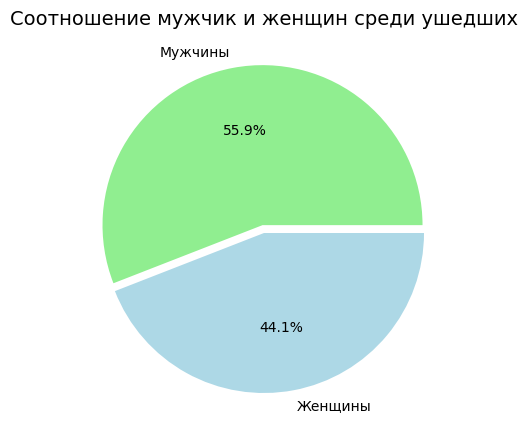

In [12]:
churn_data_Gender = churn_data[churn_data.Exited == 1].Gender.value_counts()
churn_data_Gender.index = ['Мужчины', 'Женщины']
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data_Gender,
    labels=churn_data_Gender.index,
    autopct='%.1f%%',
    explode = [0.05, 0],
    colors=['lightgreen','lightblue'],
)
axes.set_title('Соотношение мужчик и женщин среди ушедших', fontsize=14)

***Комментарии к графику:***  

В абсолютном числе мужчины уходят чаще, но у банка в принципе клиентов мужчин больше, чем женщин.  

Поэтому проведём дополнительные расчёты

<AxesSubplot:>

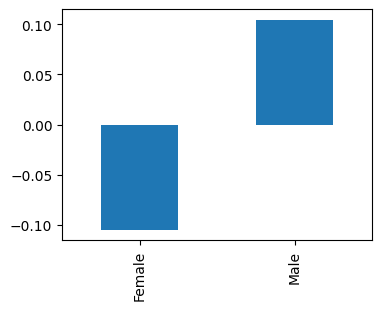

In [13]:
cd_Gender_All = churn_data.Gender.value_counts(normalize=True) # Соотношение мужчин/женщин во всех данных
cd_Gender_Exited = churn_data[churn_data.Exited == 1].Gender.value_counts(normalize=True) # Соотношение мужчин/женщин среди ушедших

fig = plt.figure(figsize=(4, 3))
(cd_Gender_All - cd_Gender_Exited).plot(kind='bar')

**Комментарии к графику:**  

Доля женщин среди ушедших выше, чем среди всех клиентов. Соответственно, удержание женщин у банка работает хуже. Мужчины уходят реже

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?
Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0.5, 1.0, 'Количество лояльных и ушедших клиентов в зависимости от количества подключенных услуг банка')

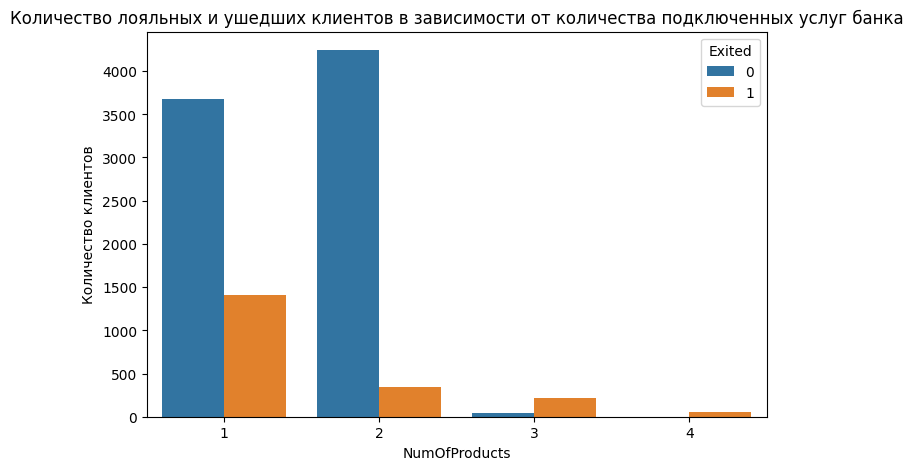

In [14]:
fig = plt.figure(figsize=(8, 5))

plot = sns.countplot(
    data=churn_data,
    x='NumOfProducts',
    hue='Exited'
)

plot.set_ylabel('Количество клиентов')
plot.set_title('Количество лояльных и ушедших клиентов в зависимости от количества подключенных услуг банка')

**Комментарии к графику:**  

Наибольшее количество лояльных клиентов имеют 2 услуги.  
Отношение ушедших к лояльным клиентам резко увеличивается, если клиент имеет 3 или 4 услуги от банка.

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

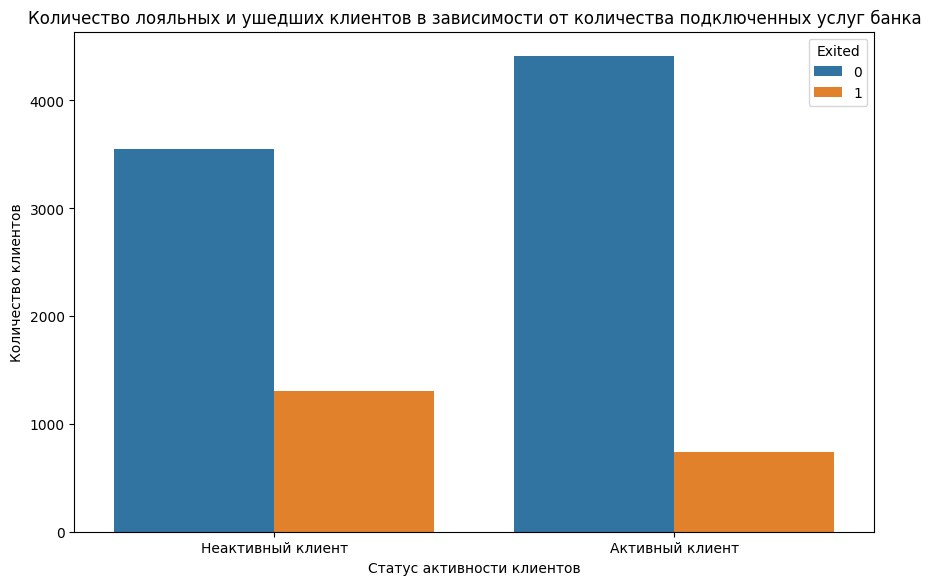

In [15]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0,0,1,1])

plot = sns.countplot(
    data=churn_data,
    x='IsActiveMember',
    hue='Exited'
)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Неактивный клиент', 'Активный клиент'])

plot.set_xlabel('Статус активности клиентов')
plot.set_ylabel('Количество клиентов')
plot.set_title('Количество лояльных и ушедших клиентов в зависимости от количества подключенных услуг банка');

**Комментарии к графику:**  

При наличии статуса активного клиента клиенты уходят значительно реже.

### 9.9. В какой стране доля ушедших клиентов больше? 
Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [16]:
table = pd.pivot_table(churn_data, values='CustomerId', index=['Geography'], columns=['Exited'], aggfunc='count')
table['Exited_rate'] = table[1] / (table[0] + table[1])
table

Exited,0,1,Exited_rate
Geography,,,
France,4204,810,0.161548
Germany,1695,814,0.324432
Spain,2064,413,0.166734


In [17]:
fig = px.choropleth(
    data_frame=table, #DataFrame
    locations=table.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited_rate", #от чего зависит цвет
    hover_name=table.index, #столбец для добавления информации при наведении
    color_continuous_scale=px.colors.sequential.Plasma, #палитра цветов
    range_color=[round(table.Exited_rate.min() - 0.1, 2), round(table.Exited_rate.max() + 0.1, 2)] #диапазон цвета
)

fig.show()

**Комментарии к графику:**  

Доля ушедших больше в Германии. Почти половина клиентов из этой страны покинули банк.  
Например, изменилась политика Германии и появлись новые комиссии за пользование "не своим" банком. Клиенты решили пойти в свои.

### 9.10. Переведите числовой признак CreditScore в категориальный. 
Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже.  
Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [18]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data.CreditScore.apply(lambda x: get_credit_score_cat(x))

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (`CreditScoreCat`), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (`Tenure`). В ячейках сводной таблицы должно находиться среднее по признаку оттока (`Exited`) — доля ушедших пользователей.

In [19]:
table = pd.pivot_table(churn_data, values='Exited', index=['CreditScoreCat'], columns=['Tenure'], aggfunc='mean')

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

<AxesSubplot:xlabel='Tenure', ylabel='CreditScoreCat'>

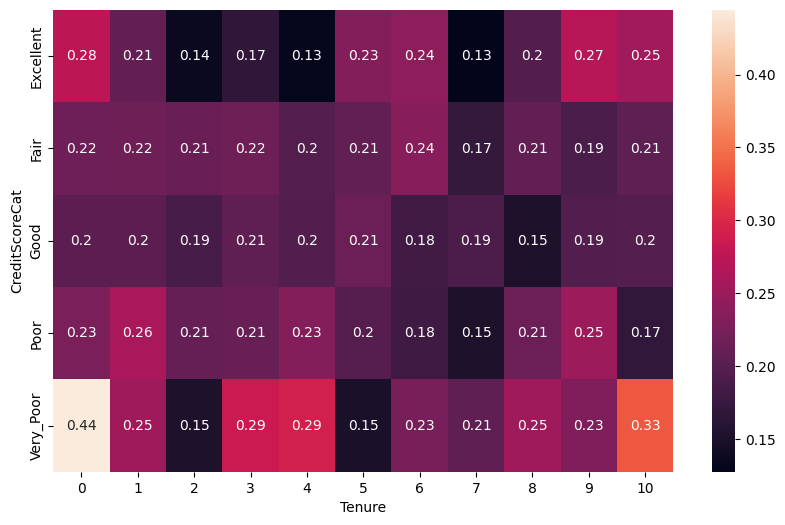

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(round(table, 21), annot=True)

**Комментарии к графику:**  

Чаще всего уходят очень бедные клиенты, которые пользовались услугами банка либо менее 1 года, либо 10 лет.